In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from bokeh.plotting import figure, output_file, show
from bokeh.layouts import row
from bokeh.io import output_notebook
import statsmodels.api as sm
import statsmodels.api as smf
from patsy import dmatrices
import sklearn
import sklearn.metrics
from sklearn import ensemble
from sklearn import linear_model
import warnings
warnings.filterwarnings('ignore')
output_notebook()
%matplotlib inline

Loading BokehJS ...

In [2]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv"
wine = pd.read_csv(url)

In [3]:

wine.head(n=5)

,"fixed acidity;""volatile acidity"";""citric acid"";""residual sugar"";""chlorides"";""free sulfur dioxide"";""total sulfur dioxide"";""density"";""pH"";""sulphates"";""alcohol"";""quality"""
0,7.4;0.7;0;1.9;0.076;11;34;0.9978;3.51;0.56;9.4;5
1,7.8;0.88;0;2.6;0.098;25;67;0.9968;3.2;0.68;9.8;5
2,7.8;0.76;0.04;2.3;0.092;15;54;0.997;3.26;0.65;...
3,11.2;0.28;0.56;1.9;0.075;17;60;0.998;3.16;0.58...
4,7.4;0.7;0;1.9;0.076;11;34;0.9978;3.51;0.56;9.4;5


In [4]:
wine = pd.read_csv(url, sep=";")
wine.head(n=5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [5]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [6]:
wine.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [7]:
wine.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [8]:

wine.rename(columns={'fixed acidity': 'fixed_acidity','citric acid':'citric_acid','volatile acidity':'volatile_acidity','residual sugar':'residual_sugar','free sulfur dioxide':'free_sulfur_dioxide','total sulfur dioxide':'total_sulfur_dioxide'}, inplace=True)
wine.head(n=5)

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [9]:
wine['quality'].unique()


array([5, 6, 7, 4, 8, 3], dtype=int64)

In [10]:

wine.quality.value_counts().sort_index()

3     10
4     53
5    681
6    638
7    199
8     18
Name: quality, dtype: int64

<AxesSubplot:xlabel='quality', ylabel='count'>

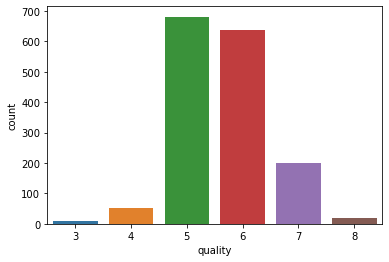

In [11]:
sns.countplot(x='quality', data=wine)

In [12]:
conditions = [
    (wine['quality'] >= 7),
    (wine['quality'] <= 4)
]
rating = ['good', 'bad']
wine['rating'] = np.select(conditions, rating, default='average')
wine.rating.value_counts()

average    1319
good        217
bad          63
Name: rating, dtype: int64

In [13]:

wine.groupby('rating').mean()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
rating,,,,,,,,,,,,
average,8.254284,0.538560,0.258264,2.503867,0.088973,16.368461,48.946929,0.996867,3.311296,0.647263,10.252717,5.483700
bad,7.871429,0.724206,0.173651,2.684921,0.095730,12.063492,34.444444,0.996689,3.384127,0.592222,10.215873,3.841270
good,8.847005,0.405530,0.376498,2.708756,0.075912,13.981567,34.889401,0.996030,3.288802,0.743456,11.518049,7.082949


<AxesSubplot:>

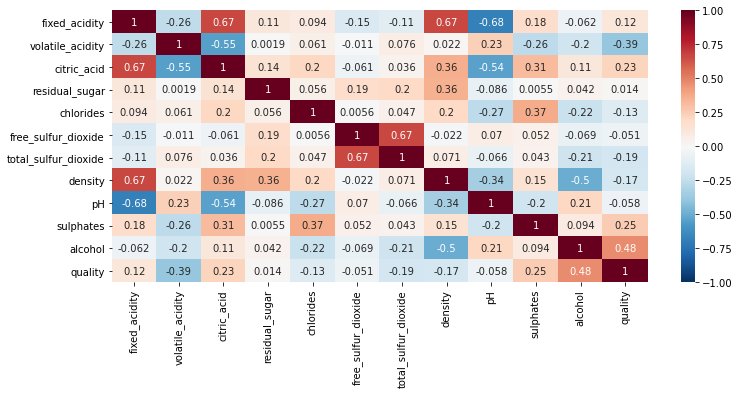

In [14]:
correlation = wine.corr()
plt.figure(figsize=(12, 5))
sns.heatmap(correlation, annot=True, linewidths=0, vmin=-1, cmap="RdBu_r")


In [15]:
correlation['quality'].sort_values(ascending=False)

quality                 1.000000
alcohol                 0.476166
sulphates               0.251397
citric_acid             0.226373
fixed_acidity           0.124052
residual_sugar          0.013732
free_sulfur_dioxide    -0.050656
pH                     -0.057731
chlorides              -0.128907
density                -0.174919
total_sulfur_dioxide   -0.185100
volatile_acidity       -0.390558
Name: quality, dtype: float64

[Text(0.5, 0, 'Wine Quality'),
 Text(0, 0.5, 'Alcohol Percent'),
 Text(0.5, 1.0, 'Alcohol percent in different wine quality types')]

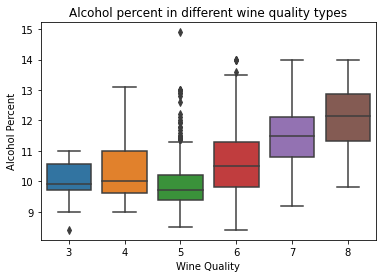

In [16]:
bx = sns.boxplot(x="quality", y='alcohol', data = wine)
bx.set(xlabel='Wine Quality', ylabel='Alcohol Percent', title='Alcohol percent in different wine quality types')


[Text(0.5, 0, 'Wine Ratings'),
 Text(0, 0.5, 'Sulphates'),
 Text(0.5, 1.0, 'Sulphates in different types of Wine ratings')]

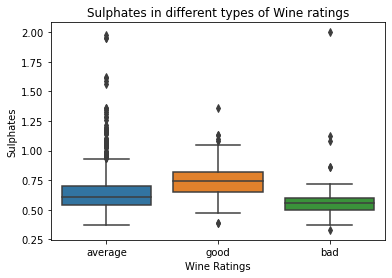

In [17]:

bx = sns.boxplot(x="rating", y='sulphates', data = wine)
bx.set(xlabel='Wine Ratings', ylabel='Sulphates', title='Sulphates in different types of Wine ratings')


[Text(0.5, 0, 'Wine Ratings'),
 Text(0, 0.5, 'Citric Acid'),
 Text(0.5, 1.0, 'Xitric_acid in different types of Wine ratings')]

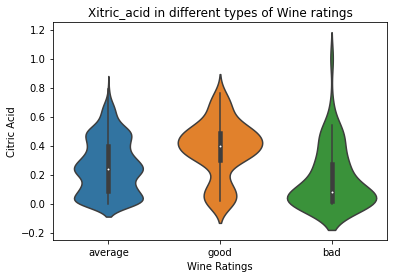

In [18]:

bx = sns.violinplot(x="rating", y='citric_acid', data = wine)
bx.set(xlabel='Wine Ratings', ylabel='Citric Acid', title='Xitric_acid in different types of Wine ratings')


[Text(0.5, 0, 'Wine Ratings'),
 Text(0, 0.5, 'Fixed Acidity'),
 Text(0.5, 1.0, 'Fixed Acidity in different types of Wine ratings')]

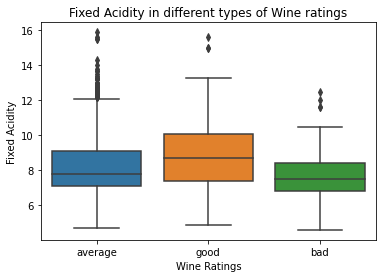

In [19]:
bx = sns.boxplot(x="rating", y='fixed_acidity', data = wine)
bx.set(xlabel='Wine Ratings', ylabel='Fixed Acidity', title='Fixed Acidity in different types of Wine ratings')

[Text(0.5, 0, 'Wine Ratings'),
 Text(0, 0.5, 'pH'),
 Text(0.5, 1.0, 'pH in different types of Wine ratings')]

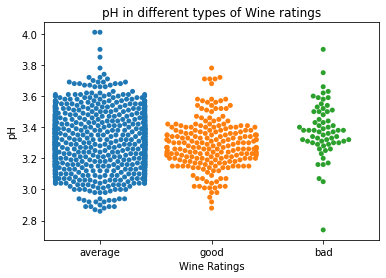

In [20]:
bx = sns.swarmplot(x="rating", y="pH", data = wine);
bx.set(xlabel='Wine Ratings', ylabel='pH', title='pH in different types of Wine ratings')

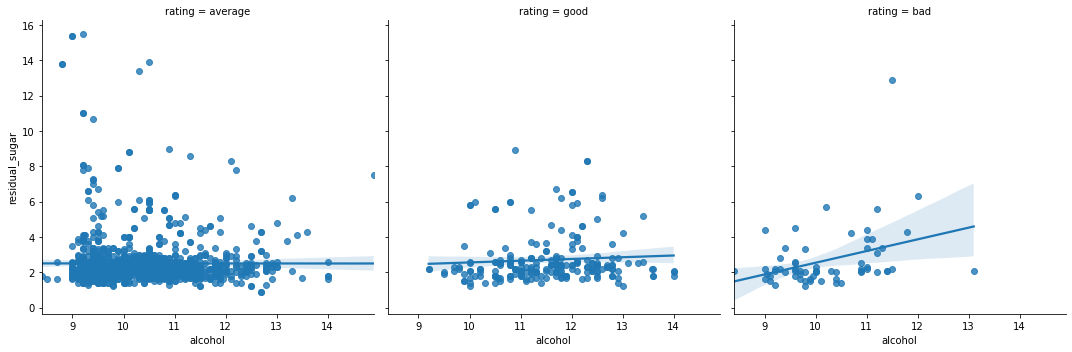

In [21]:
sns.lmplot(x = "alcohol", y = "residual_sugar", col = "rating", data = wine)

In [22]:
import statsmodels.api as sm

In [23]:
y,X = dmatrices('quality ~ alcohol', data=wine, return_type='dataframe')
print("X:", type(X))
print(X.columns)
model=smf.OLS(y, X)
result=model.fit()
result.summary()

X: <class 'pandas.core.frame.DataFrame'>
Index(['Intercept', 'alcohol'], dtype='object')


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                quality   R-squared:                       0.227
Model:                            OLS   Adj. R-squared:                  0.226
Method:                 Least Squares   F-statistic:                     468.3
Date:                Tue, 29 Sep 2020   Prob (F-statistic):           2.83e-91
Time:                        23:40:21   Log-Likelihood:                -1721.1
No. Observations:                1599   AIC:                             3446.
Df Residuals:                    1597   BIC:                             3457.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.8750      0.175     10.732      0.000       1.532       2.218
alcohol        0.3608      0.017     21.639      0.000       0.328       0.394
==============================================================================
Omnibus:                       38.501   Durbin-Watson:                   1.748
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               71.758
Skew:                          -0.154   Prob(JB):                     2.62e-16
Kurtosis:                       3.991   Cond. No.                         104.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [24]:
model = smf.OLS.from_formula('quality ~ alcohol', data = wine)
results = model.fit()
print(results.params)

Intercept    1.874975
alcohol      0.360842
dtype: float64


In [25]:
wine['rate_code'] = (wine['quality'] > 4).astype(np.float32)

<AxesSubplot:>

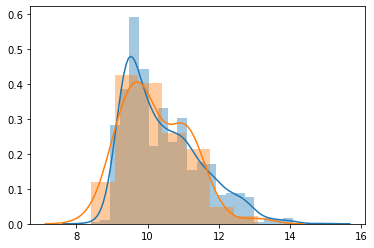

In [26]:
y, X = dmatrices('rate_code ~ alcohol', data = wine)
sns.distplot(X[y[:,0] > 0, 1])
sns.distplot(X[y[:,0] == 0, 1])


In [27]:
model = smf.Logit(y, X)
result = model.fit()
result.summary2()

Optimization terminated successfully.
         Current function value: 0.165209
         Iterations 8


<class 'statsmodels.iolib.summary2.Summary'>
"""
                        Results: Logit
===============================================================
Model:              Logit            Pseudo R-squared: 0.005   
Dependent Variable: rate_code        AIC:              532.3386
Date:               2020-09-29 23:41 BIC:              543.0928
No. Observations:   1599             Log-Likelihood:   -264.17 
Df Model:           1                LL-Null:          -265.48 
Df Residuals:       1597             LLR p-value:      0.10487 
Converged:          1.0000           Scale:            1.0000  
No. Iterations:     8.0000                                     
----------------------------------------------------------------
               Coef.   Std.Err.    z     P>|z|    [0.025  0.975]
----------------------------------------------------------------
Intercept      1.0456    1.3628  0.7673  0.4429  -1.6253  3.7166
alcohol        0.2082    0.1327  1.5685  0.1168  -0.0519  0.4683
===============================================================

"""

In [28]:
model = smf.Logit(y, X)
result = model.fit()
result.summary2()

Optimization terminated successfully.
         Current function value: 0.165209
         Iterations 8


<class 'statsmodels.iolib.summary2.Summary'>
"""
                        Results: Logit
===============================================================
Model:              Logit            Pseudo R-squared: 0.005   
Dependent Variable: rate_code        AIC:              532.3386
Date:               2020-09-29 23:41 BIC:              543.0928
No. Observations:   1599             Log-Likelihood:   -264.17 
Df Model:           1                LL-Null:          -265.48 
Df Residuals:       1597             LLR p-value:      0.10487 
Converged:          1.0000           Scale:            1.0000  
No. Iterations:     8.0000                                     
----------------------------------------------------------------
               Coef.   Std.Err.    z     P>|z|    [0.025  0.975]
----------------------------------------------------------------
Intercept      1.0456    1.3628  0.7673  0.4429  -1.6253  3.7166
alcohol        0.2082    0.1327  1.5685  0.1168  -0.0519  0.4683
===============================================================

"""

In [29]:
yhat = result.predict(X) > 0.955
print(sklearn.metrics.classification_report(y, yhat))

              precision    recall  f1-score   support

         0.0       0.04      0.32      0.07        63
         1.0       0.96      0.69      0.80      1536

    accuracy                           0.67      1599
   macro avg       0.50      0.50      0.44      1599
weighted avg       0.92      0.67      0.77      1599



In [30]:

model = sklearn.linear_model.LogisticRegression()
y,X = dmatrices('rate_code ~ alcohol + sulphates + citric_acid + fixed_acidity', data = wine)
model.fit(X, y)
yhat = model.predict(X)
print(sklearn.metrics.classification_report(y, yhat))


              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00        63
         1.0       0.96      1.00      0.98      1536

    accuracy                           0.96      1599
   macro avg       0.48      0.50      0.49      1599
weighted avg       0.92      0.96      0.94      1599



In [31]:
y, X = dmatrices('rate_code ~ alcohol', data = wine)
model = sklearn.ensemble.RandomForestClassifier()
model.fit(X, y)
yhat = model.predict(X)
print(sklearn.metrics.classification_report(y, yhat))

              precision    recall  f1-score   support

         0.0       1.00      0.03      0.06        63
         1.0       0.96      1.00      0.98      1536

    accuracy                           0.96      1599
   macro avg       0.98      0.52      0.52      1599
weighted avg       0.96      0.96      0.94      1599

